<a href="https://colab.research.google.com/github/cthitch137/PHYS250/blob/main/Collin_Hitchcock_Lab10_Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 10: Random Walk and Diffusion

## Overview
We will study:
* random walk in 1 dimension
* random walk in 2D
* diffusion

## Wiki Summary

* answer any questions below in your wiki summary.

In [ ]:
# import numpy and pyplot
import numpy as np
import matplotlib.pyplot as plt

# Part 0: Random Numbers

### Uniform Random Numbers

We will use `np.random.random` to generate random numbers between zero and 1.  

* random numbers drawn from other distributions


### Part 0a: Rolling a Die

(5 points)

Create a function called `rolldie` that doesn't take any input but returns a number from one to six.

* Call you function 10, 100, and 1000 times, and create a histogram from the resulting values.

* You should plot the three cases (10, 100,1000 rolls) side by side in one figure.

**QUESTION**
* Comment on the distribution and how it changes as the number of rolls increases.

**The distribution becomes much more even the more rolls there are. Theres a more likely chance for each of the numbers to at least be rolled close to the same amount of times over 1000 rolls, than compared to 10 rolls. That isn't to say there is no chance for a 6 to never be rolled, its just less likely.**

In [ ]:
# your function rolldie here
def rolldie():
  """
  Generates a random number between 1 and 6

  INPUTS:
  NONE

  RETURNS:
  roll - number generated
  """
  roll = np.random.randint(low=1,high=7)

  return roll

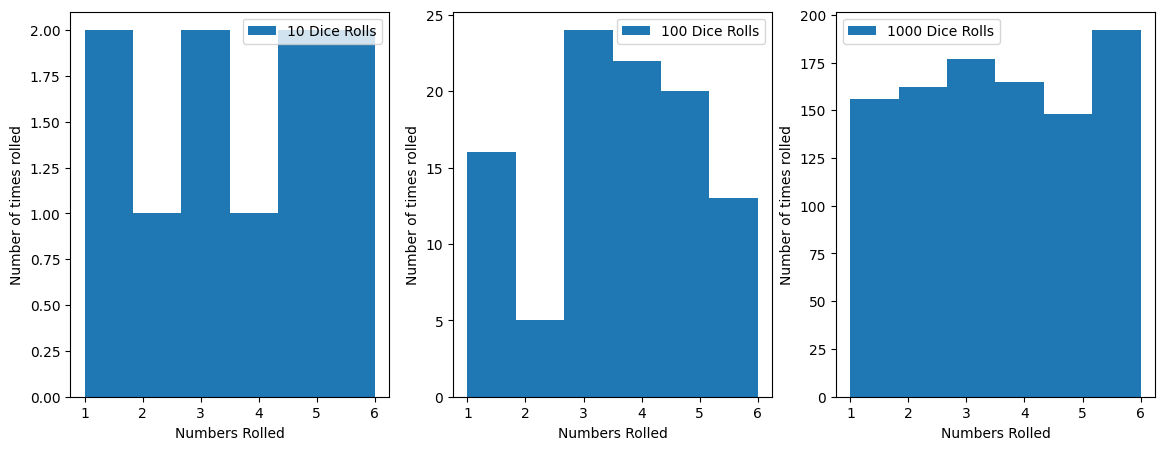

In [ ]:
rolls_list = [10, 100, 1000]
plt.figure(figsize=(14,5))
for i in range(len(rolls_list)):
  rolls = []
  plt.subplot(1,3,i+1)
  plt.xlabel('Numbers Rolled')
  plt.ylabel('Number of times rolled')
  for l in range(rolls_list[i]):
    rolls.append(rolldie())
  plt.hist(rolls,bins=max(rolls),label=f"{rolls_list[i]} Dice Rolls")
  plt.legend()

# Part 1: Random Walkers in One Dimension

* We will start with a one-dimensional random walker.
* Assume that our walker can take a step of length 1, and that the direction is either left (negative) or right (positive).
* The walker is equally likely to move left or right with each step.
* To determine the direction of the step, draw a random number.  
  * If the random number is < 0.5, then the walker steps to the left.
  * Otherwise the walker steps right.
* We will assume that the time between steps is fairly constant, so that the step number is directly proportional to time.

### Part 1a: Write a Function

(5 points)

Write a function called `randomwalker` that will calculate the position of a random walker for Nsteps.

Input
* optional argument `Nsteps`, which has a default value of 100.
* optional argument `stepsize`, which has a default value of 1.

The function will:
* initialize an array `x` of length `Nsteps` to store the x values at each step.
* calculate the walker's position at each of the steps

Return
* the position array




In [ ]:
# Your randomwalker function here
def randomwalker(Nsteps=100, stepsize=1):
  """
  Makes a position array based on the number of steps for each step size

  INPUT:
  Nsteps - number of steps taken
  stepsize - step increments

  RETURN:
  pos - position array
  """
  pos = np.zeros(Nsteps)
  for i in range(1,Nsteps):
    rand = np.random.random()
    if rand < 0.5:
      pos[i] = pos[i-1] - stepsize
    else:
      pos[i] = pos[i-1] + stepsize


  return pos

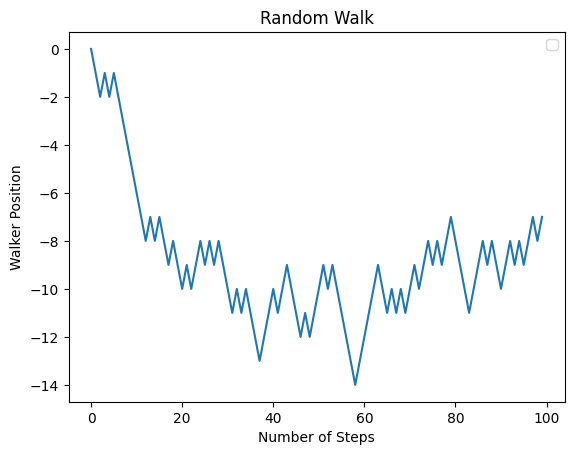

In [ ]:
pos = randomwalker()
plt.plot(pos)
plt.title('Random Walk')
plt.xlabel('Number of Steps')
plt.ylabel('Walker Position')
plt.legend()

### Part 1b: Two Random Walkers

(5 points)

* Use your `randomwalker` function to get the position of two walkers who take 100 steps.
* Make a plot of the walker's position as a function of step number.  You should plot both walkers on the same graph, but use a different symbol for each.  Be sure to plot with points rather than a line.
* Include all necessary labels on your graph.


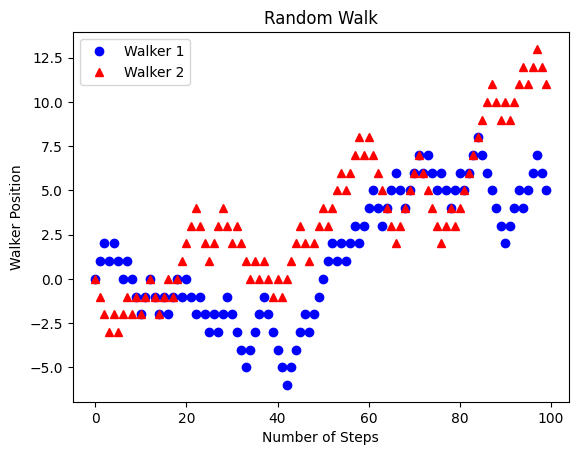

In [ ]:
# your code and graph here
walker1 = randomwalker()
walker2 = randomwalker()

plt.plot(walker1,'bo',label='Walker 1')
plt.plot(walker2,'r^',label='Walker 2')
plt.title('Random Walk')
plt.xlabel('Number of Steps')
plt.ylabel('Walker Position')
plt.legend()

### Part 1-c: Calculate the mean square distance for a large ensemble of walkers

(5 points)

* The goal is to create a plot of the average of the square of the distance, $\langle x^2 \rangle$, as a function of step number.  
* We will calculate this for a sample of 500 walkers, where each walker takes 100 steps.
* We will then fit $\langle x^2 \rangle$ as a function of step number and plot the best-fit relation with the data.


In [ ]:
Nwalkers = 500
Nsteps = 100
# create an array xsq_sum to store 100 values of the x^2
xsq_sum=np.zeros(Nsteps)
# create a loop to call your function 500 times (or Nwalkers times)
for i in range(1,Nwalkers):
  pos = randomwalker(Nsteps)
# after each call, square the x values that are returned and add them to xsum
  xsq_sum += pos**2

# once the loop is over, divide xsum by the number of walkers to get xsq_ave
xsq_ave = xsq_sum/Nwalkers

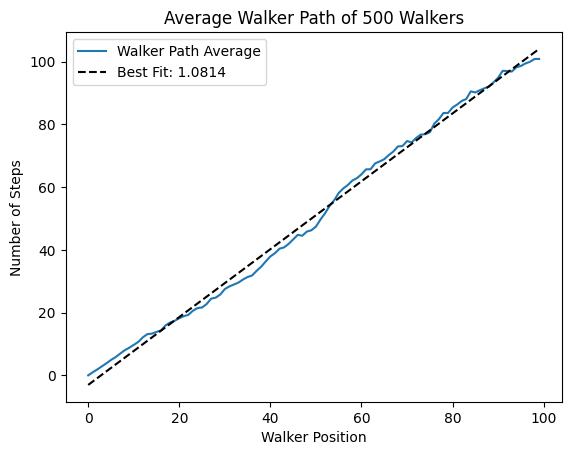

In [ ]:
# create a plot of xsq_ave versus the number of steps.
step_array = np.arange(Nsteps)
plt.plot(xsq_ave,label="Walker Path Average")
plt.title(f'Average Walker Path of {Nwalkers} Walkers')
plt.xlabel('Walker Position')
plt.ylabel('Number of Steps')

# fit a polynomial to your data
c=np.polyfit(step_array, xsq_ave, 1)

# plot the best-fit polynomial with the data
bbest_fit = np.polyval(c,step_array)

plt.plot(step_array, bbest_fit,'k--',label=f"Best Fit: {c[0]:.4f}")

plt.legend()


**Report Your Best-Fit Function Here**



### Part 1-d: The Relationship between the step size and best-fit slope.

(5 points)

Repeat the $\langle x^2 \rangle$ calculation for step sizes of 2, 3, and 4

**Fill in the values for the slope**

| Step Size | Slope |
|----|----|
| 1|0.9459 |
| 2|4.1505 |
| 3|9.8515 |
| 4|15.482 |

1. What is the general relation between the slope and the step size?

**As stepsize increases, the slope increases.**


2. How does the root-mean-square distance $\sqrt{\langle x^2 \rangle}$ scale with time?

**Taking the square root again of the mean results in a significantly lower slope. However, the larger the step size, the larger the slope. Despite that, in each of the cases of different step sizes, it seems to drop off around 80 steps.**



In [ ]:
def rand_walk(stepsizes=None, Nwalkers=500, Nsteps=100, visual=False):

  if stepsizes == None:
    stepsizes = [1]

  steparray = np.arange(Nsteps)

  plt.figure(figsize=(15,10))

  ind = 1
  for step in stepsizes:
    # create an array xsq_sum to store 100 values of the x^2
    xsq_sum=np.zeros(Nsteps)
    # create a loop to call your function 500 times (or Nwalkers times)
    for i in range(1,Nwalkers):
      pos = randomwalker(Nsteps,stepsize=step)
    # after each call, square the x values that are returned and add them to xsum
      xsq_sum += pos**2


    # once the loop is over, divide xsum by the number of walkers to get xsq_ave
    xsq_ave = xsq_sum/Nwalkers
    c=np.polyfit(steparray, xsq_ave, 1)
    best_fit = np.polyval(c,steparray)

    #Sqrt mean
    xsq_ave2 = np.sqrt(xsq_ave)
    c2=np.polyfit(steparray, xsq_ave2, 1)
    best_fit2 = np.polyval(c2,steparray)

    if visual == False:
      print(f"When the step size is {step}, the slope is {c[0]:.4f}")
      print(f"For the square root mean, the slope is {c2[0]:.4f}")

    if visual == True:
      plt.subplot(2,len(stepsizes),ind)
      plt.title(f'Step size: {step}')
      plt.plot(steparray, best_fit, 'k--', label=f'Best Fit: {c[0]:.4f}')
      plt.plot(xsq_ave,label='Walker Path')
      plt.xlabel('Steps')
      plt.ylabel('Position Value')
      plt.legend()

      plt.subplot(2,len(stepsizes),ind+len(stepsizes))
      plt.title(f'Root-Mean-Square Distance')
      plt.plot(steparray, best_fit2, 'k--', label=f'Best Fit: {c2[0]:.4f}')
      plt.plot(xsq_ave2,label=f'Walker Path, step size: {step}')
      plt.xlabel('Steps')
      plt.ylabel('Position Value')

      plt.legend()


      ind+=1

    if step == stepsizes[-1]:
      return xsq_ave, xsq_ave2, c, c2
    else:
      continue



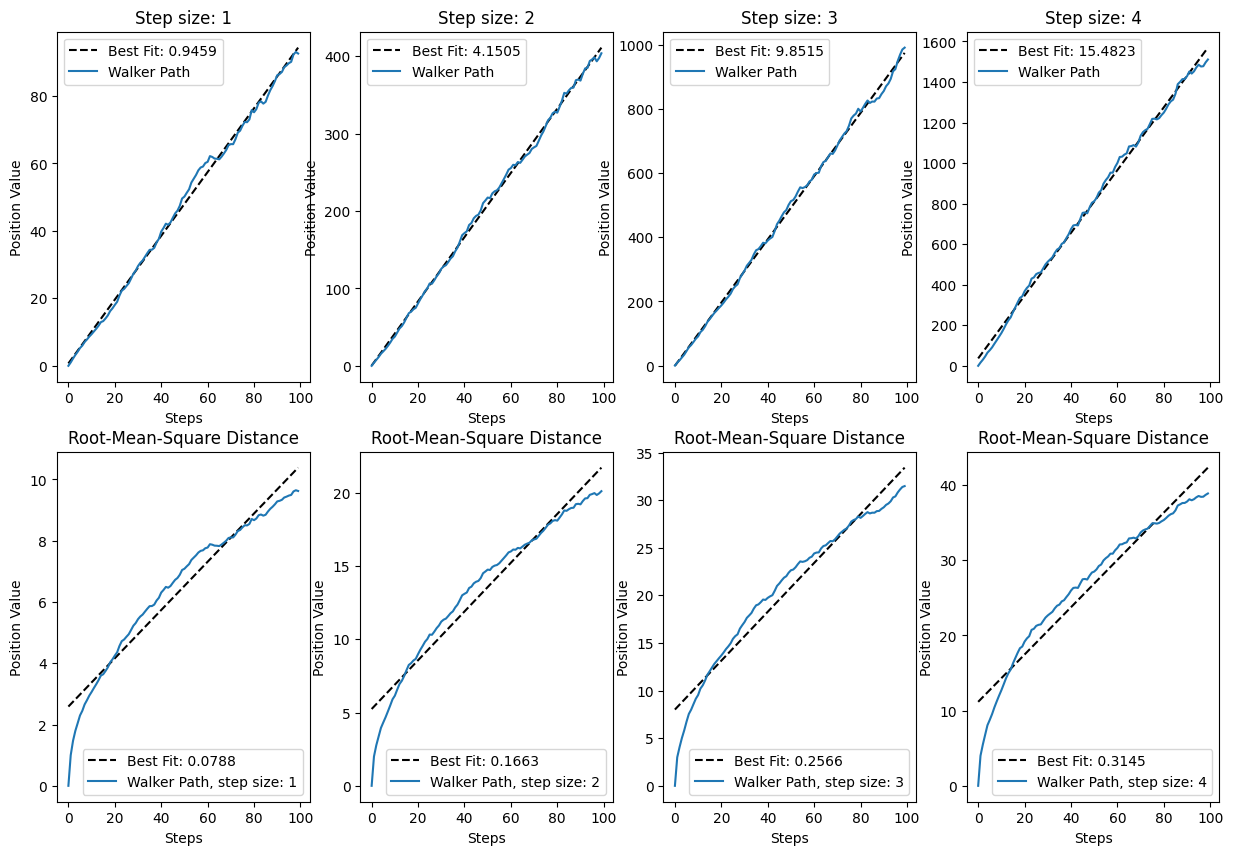

In [ ]:
stepsizes = [1,2,3,4]
Nwalkers = 500
Nsteps = 100

_=rand_walk(stepsizes,visual=True)

# Part 2: Random Walk in 2D

(5 points)

Simulate a random walk in two dimensions by allowing the walker to make steps of unit length in a random direction.  

Show that the motion is diffusive, that is, that $\langle r^2 \rangle \sim t$.  Remember that our step size is proportional to $t$.

NOTE: this part is purposely short on instructions.  We are closing in on the end of the course, so I am expecting you to think through the logic and adapt previous code to address the new problem.  

In [ ]:
# write a function randomwalker2d here
## This was my original idea of how to set up the function
def old_randomwalker2d(Nsteps=100, stepsize=1):
  """
  Makes two position arrays based on the number of steps for each step size

  INPUT:
  Nsteps - number of steps taken
  stepsize - step increments

  RETURN:
  xpos - x position array
  ypos - y position array
  """
  xpos = np.zeros(Nsteps)
  ypos = np.zeros(Nsteps)

  for i in range(1,Nsteps):
    randx = np.random.random()

    if randx < 0.5:
      xpos[i] = xpos[i-1] - stepsize
    else:
      xpos[i] = xpos[i-1] + stepsize

    randy = np.random.random()
    if randy < 0.5:
      ypos[i] = ypos[i-1] - stepsize
    else:
      ypos[i] = ypos[i-1] + stepsize

  return xpos, ypos

In [ ]:
def randomwalker2d(Nsteps=100,stepsize=1):
  xpos = np.zeros(Nsteps)
  ypos = np.zeros(Nsteps)

  for i in range(1,Nsteps):
    direction = np.random.random()*2*np.pi
    x_temp = xpos[i-1] + stepsize*np.cos(direction)
    y_temp = ypos[i-1] + stepsize*np.sin(direction)

    xpos[i] = x_temp
    ypos[i] = y_temp
  return xpos, ypos

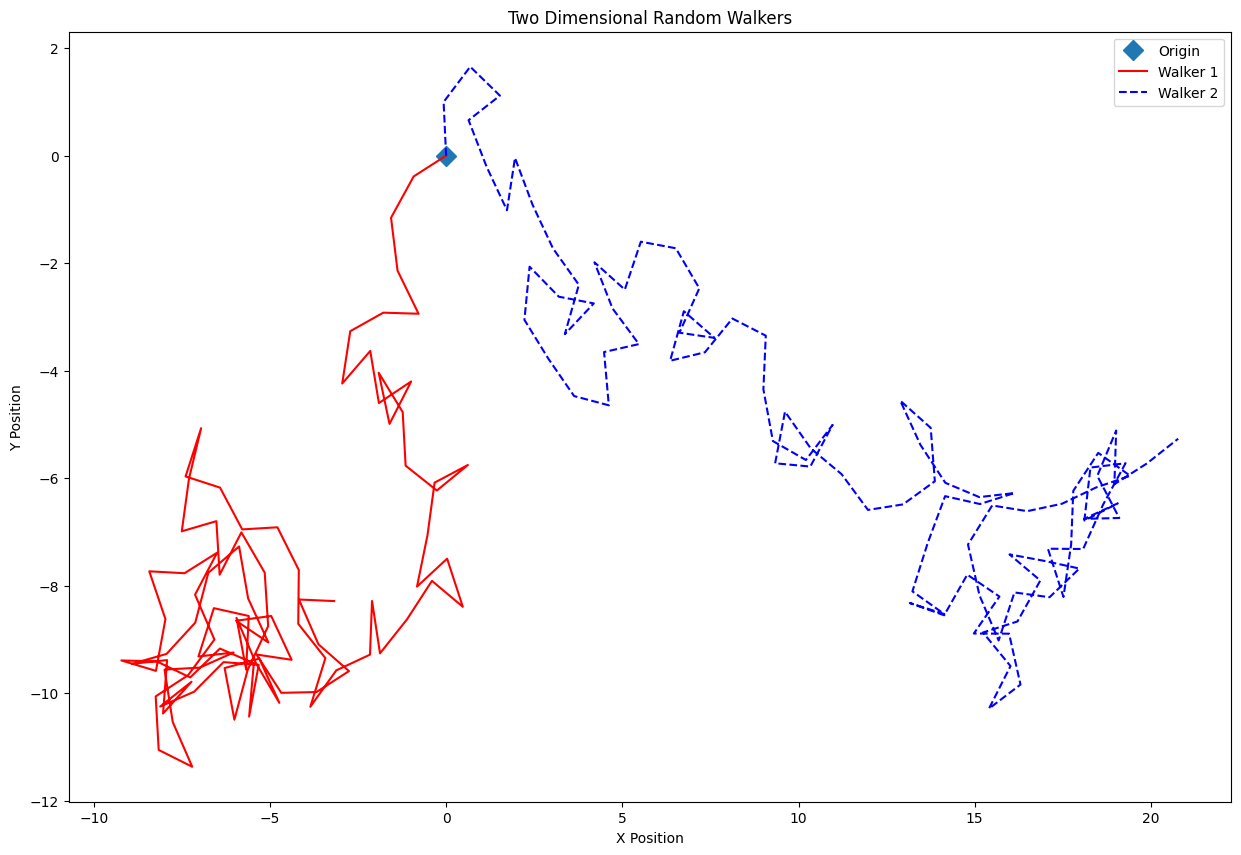

In [ ]:
# create a test for your randomwalker2d function and plot the resulting (x,y) positions
xpos1, ypos1 = randomwalker2d()
xpos2, ypos2 = randomwalker2d()

plt.figure(figsize=(15,10))

plt.plot(0,0, 'D', ms=10, label='Origin')

plt.plot(xpos1,ypos1,'r-', label='Walker 1')
plt.plot(xpos2,ypos2,'b--', label='Walker 2')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Two Dimensional Random Walkers')
plt.legend()

In [ ]:
# determine how <r^2> scales with the number of steps, as we did in Part 1
def rsq_scale2d(stepsizes=None, Nwalkers=100,Nsteps=100):
  """
  Performs r^2 scaling for a list of stepsizes, using some number of walkers, over some amount of steps

  INPUTS:
  stepsizes (list:any size, default = None [if None, auto set to 1]) - how large of a step that is taken
  Nwalkers (int, default = 100) - Number of walkers paths to be calculated
  Nsteps (int, default = 100) - How many steps are taken by each walker

  RETURNS:
  c_vals - contains slope and intercept
  """
  if stepsizes == None:
    stepsizes = [1]

  c_vals = []

  for step in stepsizes:
  # create an array xsq_sum to store 100 values of the x^2
    xsq_sum2d=np.zeros(Nsteps)
    ysq_sum2d=np.zeros(Nsteps)
  # create a loop to call your function 500 times (or Nwalkers times)
    for i in range(1,Nwalkers):
      xpos, ypos = randomwalker2d(stepsize=step)
  # after each call, square the x values that are returned and add them to xsum
      xsq_sum2d += xpos**2
      ysq_sum2d += ypos**2


  # once the loop is over, divide xsum by the number of walkers to get xsq_ave
    xsq_ave2d = xsq_sum2d/Nwalkers
    ysq_ave2d = ysq_sum2d/Nwalkers

    c2d = np.polyfit(xsq_ave2d, ysq_ave2d, 1)

    c_vals.append(c2d)

    print(f"When the step size is {step}, the slope is {c2d[0]:.4f}")

  return c_vals

In [ ]:
stepsizes = [10,100,1000,10000]
c_vals=rsq_scale2d(stepsizes)

When the step size is 10, the slope is 1.1659
When the step size is 100, the slope is 1.2247
When the step size is 1000, the slope is 1.2057
When the step size is 10000, the slope is 1.1514


# Part 3: Brownian Motion

(10 points)

Let's simulate the motion of a particle in a gas as it undergoes random collisions with gas molecules.

* Use your program from Part 2, but we will now confine the particle to a box of length $L=10$.  

* Start the particle off in the center of the box.

* If the particle gets to the edge of the box, pick another random number for its direction.   (Hint: you might want to implement this part with a `while` loop.)


In [ ]:
# Your code here
def Brownian(Nsteps=100, stepsize=1, length = 10):
  """
  Makes two position arrays based on the number of steps for each step size

  INPUT:
  Nsteps (int, default=100) - number of steps taken
  stepsize (int, default=1) - step increments
  length - (int, default=10) - size of the box

  RETURN:
  xpos - x position array
  ypos - y position array
  """
  xpos = np.zeros(Nsteps)
  ypos = np.zeros(Nsteps)

  xpos[0] = L/2
  ypos[0] = L/2

  for i in range(1, Nsteps):
    direction = np.random.random()*2*np.pi
    x_temp = xpos[i-1] + stepsize*np.cos(direction)
    y_temp = ypos[i-1] + stepsize*np.sin(direction)

    while (x_temp < 0) or (x_temp > length) or (y_temp < 0) or (y_temp > length):
      new_dir = np.random.random()*2*np.pi
      x_temp = xpos[i-1] + stepsize*np.cos(new_dir)
      y_temp = ypos[i-1] + stepsize*np.sin(new_dir)

    xpos[i] = x_temp
    ypos[i] = y_temp

  return xpos, ypos

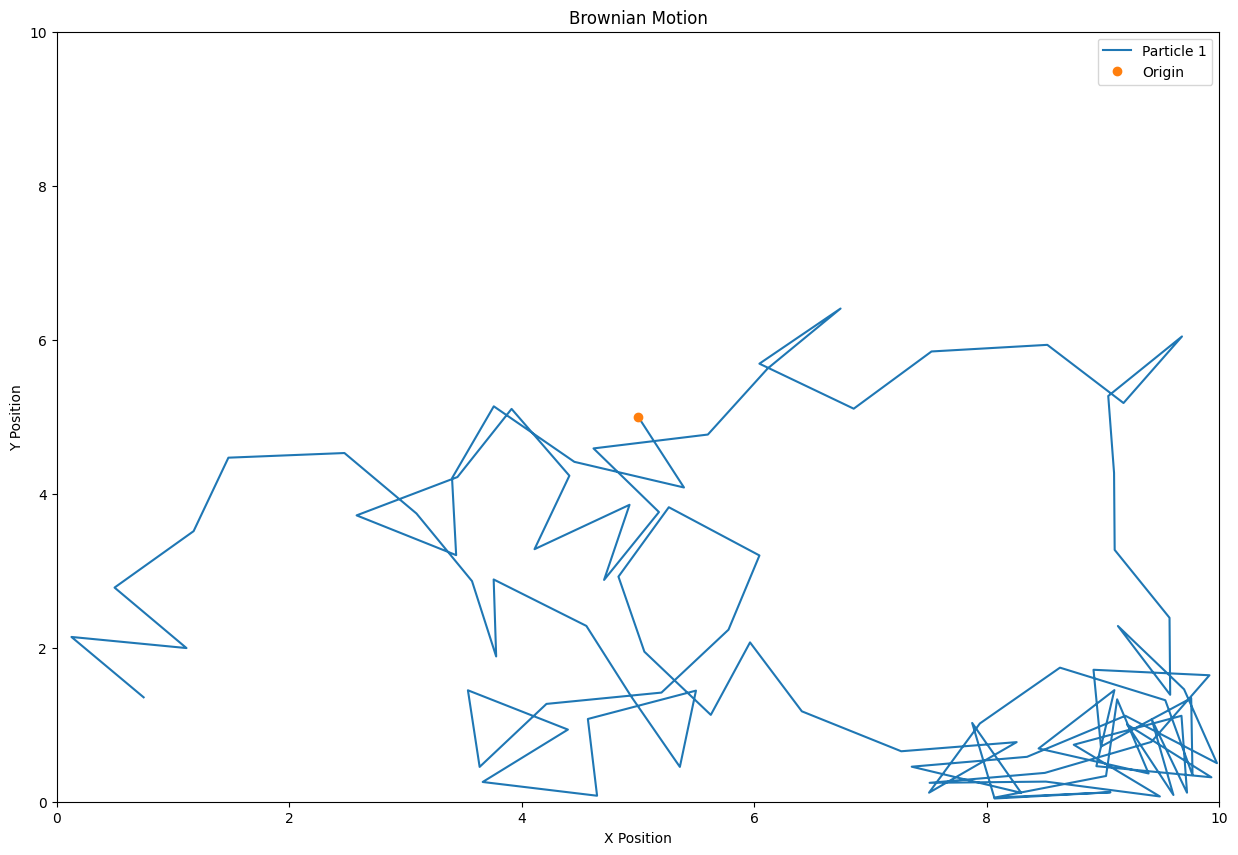

In [ ]:
# plot the (x,y) position of the particle using 100 steps
L = 10
xpos, ypos = Brownian(length=L)

plt.figure(figsize=(15,10))
plt.plot(xpos,ypos,label='Particle 1')
plt.plot(xpos[0],ypos[0],'o',label='Origin')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Brownian Motion')
plt.xlim(0,L)
plt.ylim(0,L)

plt.legend()

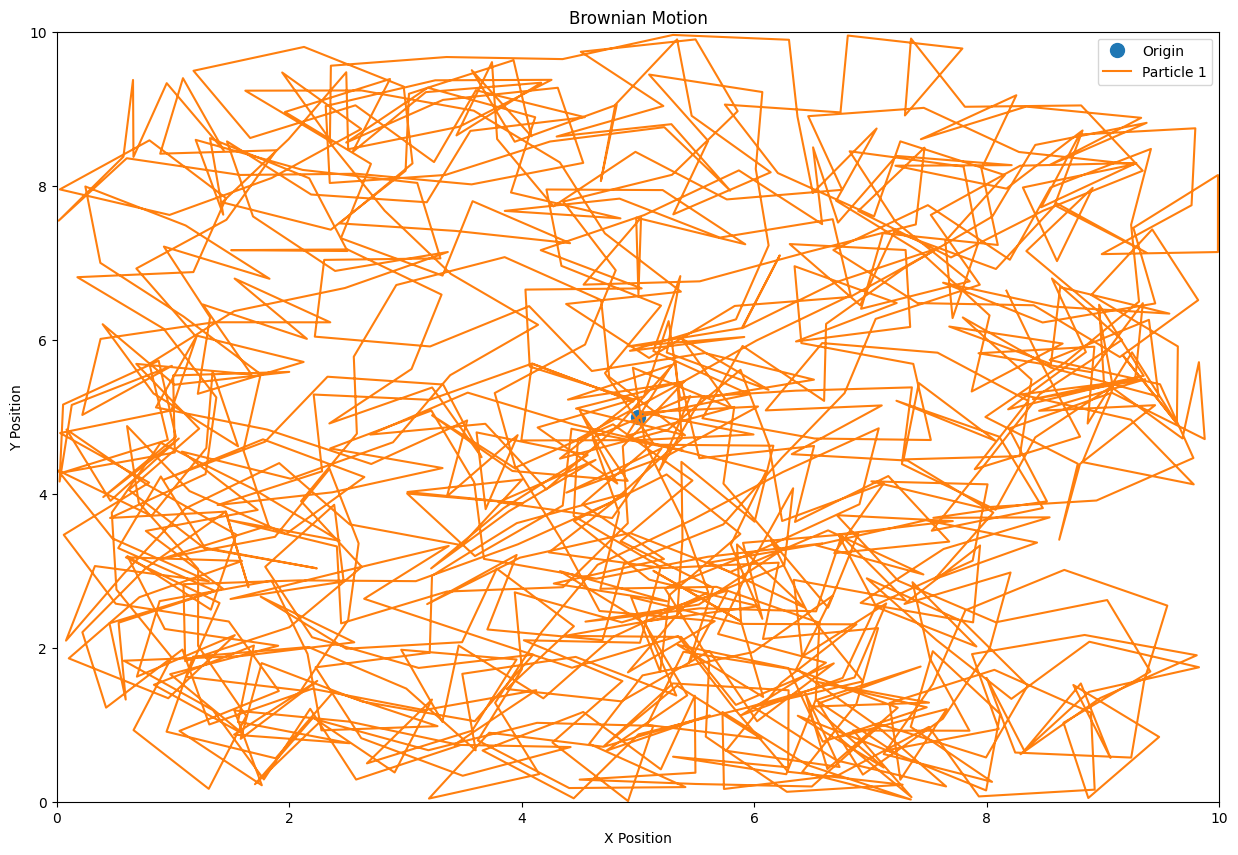

In [ ]:
# plot the (x,y) position of the particle using 1000 steps
L = 10
xpos, ypos = Brownian(Nsteps=1000,length=L)

plt.figure(figsize=(15,10))

plt.plot(xpos[0],ypos[0],'o',markersize=10, label='Origin')
plt.plot(xpos,ypos,label='Particle 1')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Brownian Motion')
plt.xlim(0,L)
plt.ylim(0,L)


plt.legend()

# Part 4 - Animate your Brownian Motion!

(5 pts)

- We are now going to animate the motion of the particle in a gas.  Please refer to our previous animation notebook (https://colab.research.google.com/drive/1lqp_y9Ng37Mq-a7urMiZsI0fBMNdCNRJ?usp=sharing) for examples of how to use animation.

- Read through the cells below and add any missing code.  Then run the animation.

- Play around with the animation settings to get the speed right - we want to be able to view the particle moving.

- When you have it working, try increasing the number of steps to 100 to follow the particle for a longer time.

In [ ]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc


In [ ]:
# ANIMATION CODE
# number of steps of random walker
nsteps = 100
print(f"Our animation will have {nsteps} timesteps")
L = 10 # length of the box that the particle is in


# call your random walker function to get the
# x and y positions
# pass in the length of the box L and the number of steps nsteps
xrand, yrand = Brownian(length=L)

fig = plt.figure()
# set the range of our axes to the size of the box
ax = plt.axes(xlim=(0, L), ylim=(0,L))


# We also need to create an empty point that we'll draw into each frame
# This looks weird but it's just a regular plot...with no data in it!
point, = ax.plot([], [], 'ro', markersize=20)
line, = ax.plot([], [], 'b-', lw=3)
# We need an initialization function that empties the point at the start
# of the animation
#
# These initialization routines are fairly common in other programs and
# routines.
#
# Note that all this is doing is emptying out the data!
def init():
    point.set_data([], [])
    line.set_data([], [])
    return point, line,

# Now we need an animate function that takes in the step number
# and sets the values for the points
def animate(i):
    point.set_data(xrand[i], yrand[i])
    line.set_data(xrand[:i], yrand[:i])
    return point, line,

# Note that the number of frames is the number of steps here, though it doesn't have to be
# interval is the time in milliseconds between frames
# blit is whether or not to *only* draw the new stuff, see what happens when it's False
anim_walker = FuncAnimation(fig, animate, init_func=init,
                               frames=nsteps, interval=100, blit=True)

# We need this so it doesn't draw an extra figure
plt.close()

Our animation will have 100 timesteps


In [ ]:
# Run the animation here
rc('animation', html='jshtml')
anim_walker


<ipython-input-23-e9e19ee8f5b2>:37: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(xrand[i], yrand[i])


# Bonus!

(3 points)

Add a line to your animation of Brownian motion to show the path that the particle travels.  This should be in addition to the red point that shows its current location.

Refer back to our animation notebook for help - the sine curve animation should be most helpful!